In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_file = "data/city_data.csv"
ride_file= "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_file)
ride_data = pd.read_csv(ride_file)

# Combine the data into a single dataset
pyber_df = pd.merge(ride_data, city_data, on="city", how="left")

# Display the data table for preview
pyber_df.head()



,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

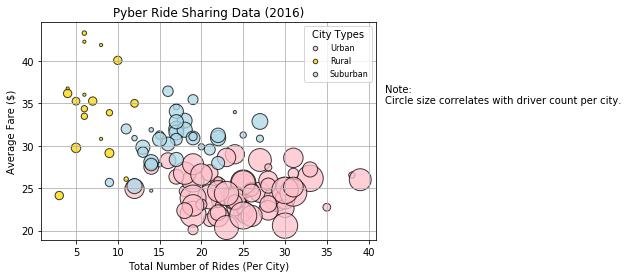

In [2]:
# Label x-axis, y-axis, and graph title
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Obtain the data frames for the city type(urban_rural,suburban) and then group the data frames by city
urban_city_type = pyber_df[pyber_df["type"] == "Urban"].groupby([pyber_df["city"]])
rural_city_type = pyber_df[pyber_df["type"] == "Rural"].groupby([pyber_df["city"]])
suburban_city_type = pyber_df[pyber_df["type"] == "Suburban"].groupby([pyber_df["city"]])

# Obtain the x and y coordinates for each of the three city types (Urban, rural, suburban)
# Calculate of ride count (x), fare average(y), driver count average(s as in size)
x_urban = urban_city_type["ride_id"].count()
y_urban = urban_city_type["fare"].mean()
s_urban = urban_city_type["driver_count"].mean()

x_rural = rural_city_type["ride_id"].count()
y_rural = rural_city_type["fare"].mean()
s_rural = rural_city_type["driver_count"].mean()

x_suburban = suburban_city_type["ride_id"].count()
y_suburban = suburban_city_type["fare"].mean()
s_suburban = suburban_city_type["driver_count"].mean()


# Build the scatter plots for each city types
plt.scatter(x_urban, y_urban, label = "Urban", s=s_urban * 10, color=["pink"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_rural, y_rural, label = "Rural", s=s_rural * 10, color=["gold"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_suburban, y_suburban, label = "Suburban", s=s_suburban  * 10, color=["lightblue"], edgecolor="black", alpha = 0.75, marker="o")
plt.grid()


# Create a legend 
legend = plt.legend(fontsize = 8, title= "City Types", loc="best") 

# Adjust the legend 
legend.legendHandles[0]._sizes = [20]
legend.legendHandles[1]._sizes = [20]
legend.legendHandles[2]._sizes = [20]

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)

# Save figure and parameters to fit the whole image
plt.savefig("PyberRideSharingData.png", box_inches="tight")

# Show figure
plt.show()





## Total Fares by City Type

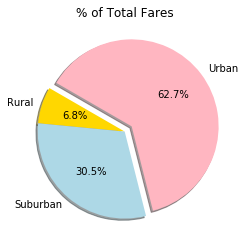

In [3]:
# Calculate Type Percents
city_groupby = pyber_df.groupby(['type'])
fare_sum = city_groupby['fare'].sum()

# Build Pie Chart
plt.title("% of Total Fares")
labels = ["Rural","Suburban","Urban"]
colors = ["gold", "lightblue", "lightpink"]
explode = (0, 0, 0.1)
plt.pie(fare_sum, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)


# Save Figure
plt.savefig("TotalFaresbyCityType.png")

# Show Figure
plt.show()




## Total Rides by City Type

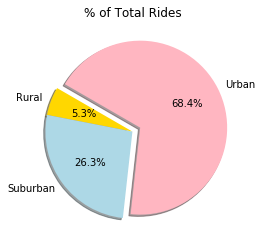

In [4]:
# Calculate Ride Percents
rides_count = city_groupby['ride_id'].count()

# Build Pie Chart
plt.title("% of Total Rides")
labels = ["Rural","Suburban","Urban"]
colors = ["gold", "lightblue", "lightpink"]
explode = (0, 0, 0.1)
plt.pie(rides_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)


# Save Figure
plt.savefig("TotalRidesbyCityType.png")

# Show Figure
plt.show()




## Total Drivers by City Type

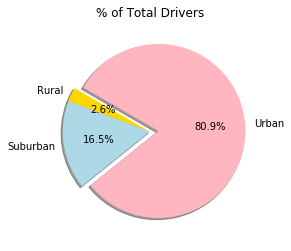

In [5]:
# Calculate Type Percents
city_groupby_drivers = city_data.groupby(['type'])
drivers_sum = city_groupby_drivers['driver_count'].sum()

# Build Pie Chart
plt.title("% of Total Drivers")
labels = ["Rural","Suburban","Urban"]
colors = ["gold", "lightblue", "lightpink"]
explode = (0, 0, 0.1)
plt.pie(drivers_sum, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)

# Save Figure
plt.savefig("TotalDriversbyCityType.png")

# Show Figure
plt.show()